<a href="https://colab.research.google.com/github/Vagishakumari13/Apollo-clone/blob/main/Vibe_Matcher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q sentence-transformers scikit-learn pandas matplotlib

In [8]:
!pip install -q openai

In [9]:
import json
from timeit import default_timer as timer
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
# OpenAI imports (optional)
import openai


# Helper: compute cosine similarity between a query vector and matrix of vectors
def top_k_similar(query_vec, item_vecs, k=3):
# item_vecs: (n_items, dim)
 sims = cosine_similarity(query_vec.reshape(1, -1), item_vecs).flatten()
 idx_sorted = np.argsort(sims)[::-1]
 top_idx = idx_sorted[:k]
 return top_idx, sims[top_idx], sims


# Save results to JSON
def save_results_json(results, filename='vibe_matcher_results.json'):
 with open(filename, 'w') as f:
  json.dump(results, f, indent=2)
  print(f"Saved results to {filename}")

In [10]:
products = [
{"name": "Boho Dress", "desc": "Flowy maxi dress with earthy tones and embroidery — perfect for festival days.", "tags": ["boho","festival","flowy"]},
{"name": "Urban Bomber Jacket", "desc": "Cropped bomber with reflective trims for energetic city nights.", "tags": ["urban","energetic","chic"]},
{"name": "Cozy Knit Sweater", "desc": "Chunky knit, neutral palette — cosy winter staple for relaxed days.", "tags": ["cozy","winter","neutral"]},
{"name": "Minimalist Trench", "desc": "Clean lines, beige trench ideal for polished, office-to-café looks.", "tags": ["minimalist","chic","polished"]},
{"name": "Festival Fringe Top", "desc": "Short fringe top, bright prints — festival and bohemian energy.", "tags": ["festival","boho","bright"]},
{"name": "Sporty Street Sneakers", "desc": "High-energy sneakers with bold soles — for fast city movement.", "tags": ["sporty","urban","energetic"]},
{"name": "Neutral Wide-Leg Pants", "desc": "Soft drape wide-leg pants in warm neutrals — effortless and relaxed.", "tags": ["relaxed","neutral","comfortable"]}
]


df = pd.DataFrame(products)
df.index.name = 'id'
df

,name,desc,tags
id,,,
0,Boho Dress,Flowy maxi dress with earthy tones and embroid...,"[boho, festival, flowy]"
1,Urban Bomber Jacket,Cropped bomber with reflective trims for energ...,"[urban, energetic, chic]"
2,Cozy Knit Sweater,"Chunky knit, neutral palette — cosy winter sta...","[cozy, winter, neutral]"
3,Minimalist Trench,"Clean lines, beige trench ideal for polished, ...","[minimalist, chic, polished]"
4,Festival Fringe Top,"Short fringe top, bright prints — festival and...","[festival, boho, bright]"
5,Sporty Street Sneakers,High-energy sneakers with bold soles — for fas...,"[sporty, urban, energetic]"
6,Neutral Wide-Leg Pants,Soft drape wide-leg pants in warm neutrals — e...,"[relaxed, neutral, comfortable]"


In [13]:
 # SBERT model (default)
def get_sbert_model(model_name='all-MiniLM-L6-v2'):
    print(f"Loading SBERT model: {model_name} ...")
    model = SentenceTransformer(model_name)
    print("Model loaded.")
    return model


# Calculate SBERT embeddings for a list of texts
def embed_with_sbert(model, texts):
    start = timer()
    embs = model.encode(texts, convert_to_numpy=True, show_progress_bar=False)
    end = timer()
    return embs, end - start


# OpenAI embeddings (optional). Requires OPENAI_API_KEY to be set.
def embed_with_openai(texts, engine='text-embedding-ada-002', api_key=None):
    if api_key:
        openai.api_key = api_key

    start = timer()
    embs = []

    for t in texts:
        response = openai.Embedding.create(input=t, model=engine)
        embs.append(response['data'][0]['embedding'])

    end = timer()
    return np.array(embs), end - start

In [14]:
# Choose embedding backend: 'sbert' or 'openai'
backend = 'sbert' # default


if backend == 'sbert':
 sbert_model = get_sbert_model()
 product_texts = (df['name'] + '. ' + df['desc']).tolist()
 prod_embs, prod_time = embed_with_sbert(sbert_model, product_texts)
 print(f"Computed {len(prod_embs)} product embeddings in {prod_time:.3f} sec")
else:
# If using OpenAI, set api_key variable or rely on environment variable
 openai_api_key = None # replace with your key if you want to use OpenAI
 product_texts = (df['name'] + '. ' + df['desc']).tolist()
 prod_embs, prod_time = embed_with_openai(product_texts, api_key=openai_api_key)
 print(f"Computed {len(prod_embs)} product embeddings in {prod_time:.3f} sec")

Loading SBERT model: all-MiniLM-L6-v2 ...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Model loaded.
Computed 7 product embeddings in 0.272 sec


In [16]:
FALLBACK_THRESHOLD = 0.4


def vibe_query_search(query,
                      backend='sbert',
                      model=None,
                      prod_embs=None,
                      top_k=3,
                      openai_api_key=None):
    """
    Embed the query (SBERT or OpenAI), compute cosine similarities against prod_embs,
    return top-k results, fallback if no score >= FALLBACK_THRESHOLD.
    """
    # Basic validation
    if prod_embs is None:
        raise ValueError("prod_embs must be provided (product embeddings).")
    if backend == 'sbert' and model is None:
        raise ValueError("When backend='sbert' you must pass a SentenceTransformer model via `model`.")

    # 1) Embed the query
    if backend == 'sbert':
        q_start = timer()
        q_vec = model.encode([query], convert_to_numpy=True)[0]
        q_time = timer() - q_start
    else:
        # openai path returns (np.array of embeddings, time)
        q_start = timer()
        q_vecs, key_time = embed_with_openai([query], api_key=openai_api_key)
        q_time = timer() - q_start
        q_vec = q_vecs[0]

    # 2) Similarity search
    s_start = timer()
    top_idx, top_sims, all_sims = top_k_similar(q_vec, prod_embs, k=top_k)
    s_time = timer() - s_start

    # 3) Build results list (make sure append is inside loop)
    results = []
    for idx, sim in zip(top_idx, top_sims):
        # Ensure idx exists in df
        try:
            item = df.loc[idx].to_dict()
        except Exception:
            # If df has different indexing, try positional access
            row = df.iloc[int(idx)]
            item = row.to_dict()
        results.append({
            "id": int(idx),
            "name": item.get('name', ''),
            "desc": item.get('desc', ''),
            "tags": item.get('tags', []),
            "score": float(sim)
        })

    # 4) Fallback logic
    strong_match = any([r['score'] >= FALLBACK_THRESHOLD for r in results])
    if not strong_match:
        fallback = True
        fallback_msg = "No strong match found — try refining your vibe description."
    else:
        fallback = False
        fallback_msg = None

    return {
        'query': query,
        'results': results,
        'fallback': fallback,
        'fallback_msg': fallback_msg,
        'timings': {'embed_time': q_time, 'search_time': s_time}
    }

In [17]:
# Ensure you have prod_embs and sbert_model defined (SBERT path)
res = vibe_query_search("energetic urban chic", backend='sbert', model=sbert_model, prod_embs=prod_embs)
print(res['query'])
for r in res['results']:
    print(f" - {r['name']}: {r['score']:.3f}")
if res['fallback']:
    print("Fallback message:", res['fallback_msg'])
print("Timings:", res['timings'])

energetic urban chic
 - Urban Bomber Jacket: 0.422
 - Sporty Street Sneakers: 0.333
 - Festival Fringe Top: 0.325
Timings: {'embed_time': 0.02581144800024049, 'search_time': 0.0063058999999157095}


In [18]:
queries = [
"energetic urban chic",
"relaxed bohemian festival",
"cozy neutral winter"
]


all_run_results = []
for q in queries:
 res = vibe_query_search(q, backend=backend, model=sbert_model, prod_embs=prod_embs)
 all_run_results.append(res)
 print('\nQuery:', q)
 if res['fallback']:
  print(res['fallback_msg'])
  for r in res['results']:
   print(f" - {r['name']} (score={r['score']:.3f})")


# Compute metrics: Top-1 similarity per query and mean of top-3 similarities
top1_list = [r['results'][0]['score'] for r in all_run_results]
mean_top3_list = [np.mean([x['score'] for x in r['results']]) for r in all_run_results]


for q, t1, m3 in zip(queries, top1_list, mean_top3_list):
 print(f"\nMetrics for '{q}': Top-1: {t1:.3f}, Mean top-3: {m3:.3f}")


# Save intermediate metrics
metrics = {
'queries': queries,
'top1': top1_list,
'mean_top3': mean_top3_list
}


Query: energetic urban chic

Query: relaxed bohemian festival

Query: cozy neutral winter

Metrics for 'energetic urban chic': Top-1: 0.422, Mean top-3: 0.360

Metrics for 'relaxed bohemian festival': Top-1: 0.585, Mean top-3: 0.348

Metrics for 'cozy neutral winter': Top-1: 0.618, Mean top-3: 0.436


Embedding times (s): [0.02190059700023994, 0.01745388799963621, 0.015662959000110277]
Similarity search times (s): [0.0011813989999609475, 0.0008123899997372064, 0.0007820900000297115]


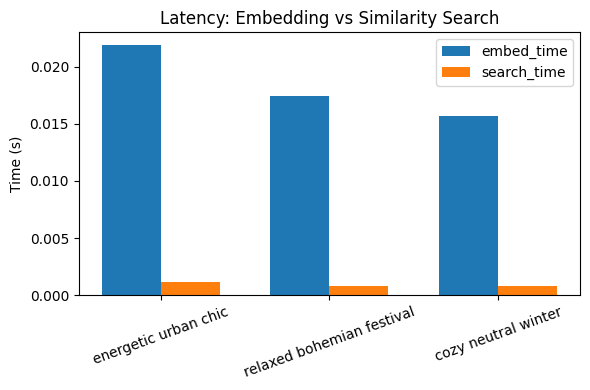

In [19]:
embed_times = [r['timings']['embed_time'] for r in all_run_results]
search_times = [r['timings']['search_time'] for r in all_run_results]


print('Embedding times (s):', embed_times)
print('Similarity search times (s):', search_times)


# Plot latencies
plt.figure(figsize=(6,4))
x = np.arange(len(queries))
bar_width = 0.35
plt.bar(x - bar_width/2, embed_times, bar_width, label='embed_time')
plt.bar(x + bar_width/2, search_times, bar_width, label='search_time')
plt.xticks(x, queries, rotation=20)
plt.ylabel('Time (s)')
plt.title('Latency: Embedding vs Similarity Search')
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
# Build results dict
results_obj = {
    'products': products,
    'runs': all_run_results,
    'metrics': metrics,
    'timings_summary': {
        'embed_times': embed_times,
        'search_times': search_times,
        'product_embedding_time': prod_time
    }
}

save_results_json(results_obj, 'vibe_matcher_results.json')

# Create a small reflection text file
reflection = '''Vibe Matcher Reflection:

- The SBERT model produced reasonable semantic matches for short vibe queries; product descriptions that shared explicit vibe words (e.g., "urban", "festival", "cozy") scored highest.
- Improvements: larger product catalog, approximate nearest neighbor index (FAISS / Pinecone) for scale, richer multimodal product data (images + text) for better matches.
- Edge cases: very vague or ambiguous vibes may return weak matches — the notebook triggers a fallback below threshold 0.4.
- Personalization ideas: user-level preference vectors, click-through fine-tuning, and UI that suggests alternative vibe keywords to refine queries.
'''

with open('vibe_reflection.txt', 'w') as f:
    f.write(reflection)

# Optional download step (only works in Google Colab)
try:
    from google.colab import files
    files.download('vibe_matcher_results.json')
    files.download('vibe_reflection.txt')
except Exception as e:
    print('Download helper not available. Files saved locally.')

Saved results to vibe_matcher_results.json


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>